**PROBLEM:** Customer Segmentation using Machine Learning.



**Goal:** To group customers based on similar purchasing behavior and demographics using unsupervised learning techniques.


**INTRODUCTION:**


1.Businesses deal with diverse customers who behave differently.

2.Segmenting customers helps in targeted marketing and personalized strategies.

3.This project aims to group customers into meaningful clusters based on their features (e.g., spending, income, age).

4.I will use K-Means Clustering (and optionally Hierarchical Clustering) for segmentation.

**OBJECTIVE:**

1.Understand the behavior of different customer groups.

2.Identify key segments like high spenders, budget buyers, or potential loyal customers.

3.Help businesses make data-driven marketing decisions.



**DATASET DESCRIPTION:**


DATASET:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Features:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1–100)

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection

In [ ]:
# loading the data from csv file to a Pandas DataFrame
data = pd.read_csv('/content/Mall_Customers.csv')

Data Analysis

In [ ]:
#let's have a look on the dataset
#first 5 rows in the dataframe
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#find the number of rows and columns
data.shape

(200, 5)

In [ ]:
#getting some information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Check missing values
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the annual income column and spending score column

In [ ]:
X = data.iloc[:,[3,4]].values

#customer_data.iloc[:,[3,4]] is telling the code to take all rows from the customer_data DataFrame, but only include the columns that are at the 3rd and 4th positions (remembering that indexing starts at 0).

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters using WCSS (Within-Cluster Sum of Squares)

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

Graph Plotting

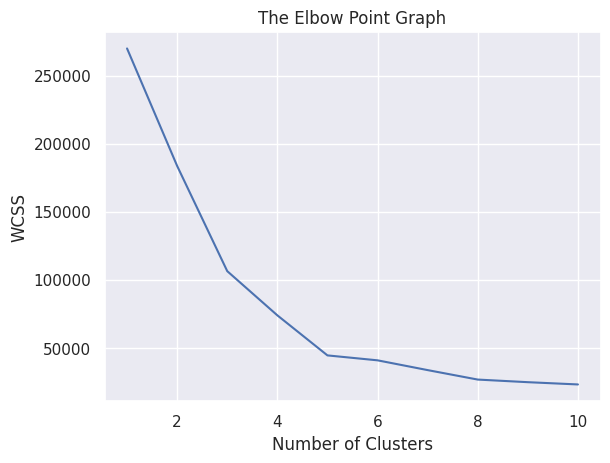

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

By using the Elbow Method and calculating the WCSS for different numbers of clusters, I've determined that 5 is likely the optimal number of clusters for this dataset based on the "elbow" in the plot.

Training the K-means clustering model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


After training, the model assigns each data point in X to one of the 5 clusters. The result is an array Y where each element is the cluster label (0, 1, 2, 3, or 4) for the corresponding data point in X.

So, there are 5 clusters - 0,1,2,3,4


Check the goodness of the model

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, Y)

# Print the Silhouette Score
print(f"The Silhouette Score for the clustering is: {silhouette_avg}")

The Silhouette Score for the clustering is: 0.553931997444648


The Silhouette Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

A score near +1 indicates that the data point is far away from the neighboring clusters.
A score of 0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
A score near -1 indicates that the data point is likely assigned to the wrong cluster.
The average Silhouette Score for our clustering is displayed above.

Visualizing the clusters

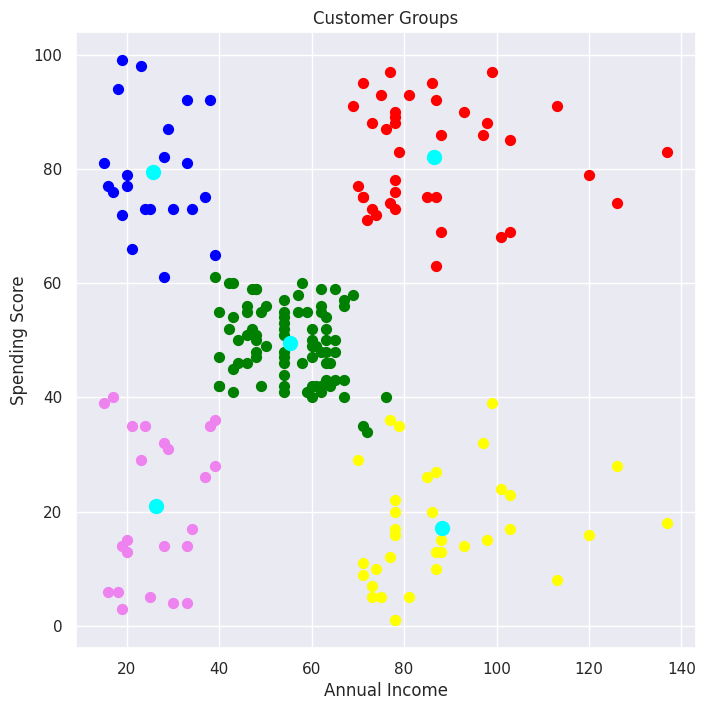

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

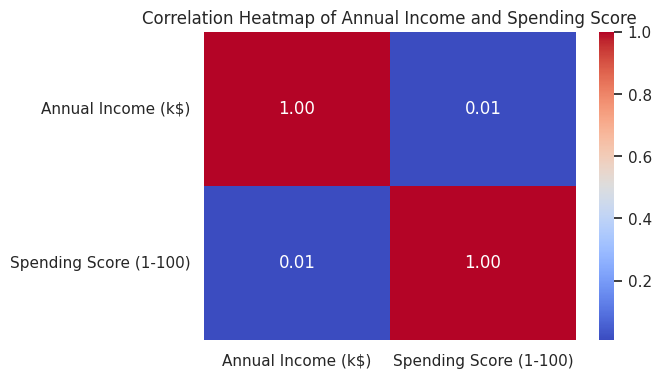

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[['Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Annual Income and Spending Score')
plt.show()

Analyze the clusters

In [ ]:
# Analyze the average age per cluster
age_distribution = data.groupby('cluster')['Age'].mean()
display(age_distribution)

,Age
cluster,
0,42.716049
1,32.692308
2,41.114286
3,45.217391
4,25.272727


In [ ]:
# Get summary statistics for each cluster
cluster_summary = data.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

# Display the summary statistics
display(cluster_summary)

Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
cluster                                                               
0        81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
1        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
2        35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
3        23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   
4        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

        Annual Income (k$)             ...                \
                     count       mean  ...    75%    max   
cluster                                ...                 
0                     81.0  55.296296  ...  62.00   76.0   
1                     39.0  86.538462  ...  95.00  137.0   
2                     35.0  88.200000  ...  97.50  137.0   
3                     23.0  26.304348  ...  33.00   39.0   
4                     22.0  25.727273  ...  32.25   39.0   

        Spending Score (1-100)                                                 \
                         count       mean        std   min   25%   50%    75%   
cluster                                                                         
0                         81.0  49.518519   6.530909  34.0  44.0  50.0  55.00   
1                         39.0  82.128205   9.364489  63.0  74.5  83.0  90.00   
2                         35.0  17.114286   9.952154   1.0  10.0  16.0  23.50   
3                         23.0  20.913043  13.017167   3.0   9.5  17.0  33.50   
4                         22.0  79.363636  10.504174  61.0  73.0  77.0  85.75   

               
          max  
cluster        
0        61.0  
1        97.0  
2        39.0  
3        40.0  
4        99.0  

[5 rows x 24 columns]

This table provides summary statistics (count, mean, standard deviation, min, max, and quartiles) for the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' within each of the 5 customer clusters. This helps to further understand the distribution of these features within each segment.

This shows the average age for customers in each cluster.

In [ ]:
# Analyze the gender distribution per cluster
gender_distribution = data.groupby('cluster')['Gender'].value_counts(normalize=True).unstack()
display(gender_distribution)

Gender,Female,Male
cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


This table shows the proportion of males and females within each cluster.

In [ ]:
# Add the cluster labels to the original DataFrame
data['cluster'] = Y

# Group the DataFrame by the cluster and calculate the mean of 'Annual Income (k$)' and 'Spending Score (1-100)'
cluster_characteristics = data.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the characteristics of each cluster
display(cluster_characteristics)

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,26.304348,20.913043
4,25.727273,79.363636


To save the trained K-Means model

In [ ]:
import pickle

# Save the trained KMeans model to a file
filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

To load the saved K-Means model

In [ ]:
import pickle

# Load the saved KMeans model from the file
loaded_model = pickle.load(open('kmeans_model.pkl', 'rb'))

# You can now use the loaded_model to predict clusters for new data
# For example:
# new_data = [[60, 50]] # Example new customer data (Annual Income, Spending Score)
# predicted_cluster = loaded_model.predict(new_data)
# print(f"The predicted cluster for the new data is: {predicted_cluster}")